In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
import osmnx as ox

In [24]:
labels

,label_id,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,label_type,severity,user_id,lat,lng,geometry
0,85053,3sAn6u8bQPVW3hTDfNUP1w,1,107.750000,-15.625000,270.675171,0.168884,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618618,-122.333054,POINT (1270567.461 229256.220)
1,85004,CpU83mS7vz17EnE02JGOkg,1,41.750000,-10.375000,129.873657,0.026001,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618134,-122.340515,POINT (1268724.129 229115.491)
2,85024,RDV4HddwNqwfBZndZRqqkA,1,100.437500,-12.625000,128.847916,0.042198,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.615307,-122.337608,POINT (1269420.738 228070.581)
3,85025,NpkOF1LfE024Ks0XIhCttw,1,136.062500,-11.500000,350.971405,1.353600,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.615089,-122.337662,POINT (1269406.018 227991.540)
4,85034,-l9SjmKbZmUfr3JV3PuTVg,1,180.312500,-15.562500,171.933517,-0.698708,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.614845,-122.337921,POINT (1269340.310 227903.754)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,96388,Ek8nn67kKNgCFjZkKf9ISA,2,348.645081,-3.973214,318.706665,0.226311,NoSidewalk,3.0,f2a1a9cc-466f-4ee2-83d4-2d8ff46a31fe,47.658714,-122.389786,POINT (1256874.338 244156.818)
195539,122316,6U9DDI4UppbHDTyp8_J3JA,1,3.171875,-32.000000,186.167953,0.891960,NoCurbRamp,5.0,7d65ec0f-4ba8-4895-abfb-eb75fab3104e,47.644711,-122.387703,POINT (1257284.338 239039.394)
195540,122337,lydaO-3xUm3YPy2sNPyPoQ,1,288.500000,-20.250000,181.292786,5.152237,SurfaceProblem,2.0,7d65ec0f-4ba8-4895-abfb-eb75fab3104e,47.641743,-122.387810,POINT (1257236.145 237957.583)
195541,122341,ubr500pdt0vImqg71_dHsQ,1,198.312500,-23.562500,180.803787,3.150978,CurbRamp,1.0,7d65ec0f-4ba8-4895-abfb-eb75fab3104e,47.641102,-122.387764,POINT (1257242.705 237723.636)


In [2]:
sidewalk = gpd.read_file('data/seattle_osm_sidewalks/seattle_osm_sidewalks.shp')
sidewalk

,osmid,geometry
0,332060236,"LINESTRING (-122.30363 47.64413, -122.30368 47..."
1,424636850,"LINESTRING (-122.30363 47.64413, -122.30356 47..."
2,426250827,"LINESTRING (-122.30363 47.64413, -122.30389 47..."
3,4636259,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
4,361443212,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
...,...,...
464759,1147534068,"LINESTRING (-122.34188 47.61708, -122.34219 47..."
464760,1144626770,"LINESTRING (-122.34171 47.61699, -122.34178 47..."
464761,1144626770,"LINESTRING (-122.34171 47.61699, -122.34048 47..."
464762,1147534080,"LINESTRING (-122.34171 47.61699, -122.34168 47..."


In [3]:
#sidewalk.explore()

In [4]:
labels = gpd.read_file('data/seattle_labels.geojson')

In [5]:
#Match coordinates
sidewalk = sidewalk.to_crs("EPSG:2285")
labels = labels.to_crs("EPSG:2285")

In [32]:
#Spatial join project sidewalk labels to sidewalk geometry
labels_mapped_on_sidewalk = labels.sjoin_nearest(sidewalk, distance_col='distance')
labels_mapped_on_sidewalk

,label_id,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,label_type,severity,user_id,lat,lng,geometry,index_right,osmid,distance
0,85053,3sAn6u8bQPVW3hTDfNUP1w,1,107.750000,-15.625000,270.675171,0.168884,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618618,-122.333054,POINT (1270567.461 229256.220),461893,609350912,5.611207
68013,90508,Z_eTIaeGBVmlni66TM0GHQ,1,2.625000,-15.750000,270.473511,0.796036,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618610,-122.333061,POINT (1270565.526 229253.474),461893,609350912,2.729305
73527,101042,lq6_t34fb1KNDKlkTuiHnQ,2,336.937500,-19.053572,90.617798,1.109062,CurbRamp,1.0,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.618591,-122.333076,POINT (1270561.628 229246.592),461893,609350912,4.937288
0,85053,3sAn6u8bQPVW3hTDfNUP1w,1,107.750000,-15.625000,270.675171,0.168884,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618618,-122.333054,POINT (1270567.461 229256.220),461894,609350915,5.611207
68013,90508,Z_eTIaeGBVmlni66TM0GHQ,1,2.625000,-15.750000,270.473511,0.796036,CurbRamp,1.0,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618610,-122.333061,POINT (1270565.526 229253.474),461894,609350915,2.729305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195537,96386,Ek8nn67kKNgCFjZkKf9ISA,2,235.754471,-11.562500,318.706665,0.226311,CurbRamp,2.0,f2a1a9cc-466f-4ee2-83d4-2d8ff46a31fe,47.658390,-122.389809,POINT (1256866.307 244038.681),413708,1051116537,0.856532
195537,96386,Ek8nn67kKNgCFjZkKf9ISA,2,235.754471,-11.562500,318.706665,0.226311,CurbRamp,2.0,f2a1a9cc-466f-4ee2-83d4-2d8ff46a31fe,47.658390,-122.389809,POINT (1256866.307 244038.681),413920,1051116537,0.856532
195538,96388,Ek8nn67kKNgCFjZkKf9ISA,2,348.645081,-3.973214,318.706665,0.226311,NoSidewalk,3.0,f2a1a9cc-466f-4ee2-83d4-2d8ff46a31fe,47.658714,-122.389786,POINT (1256874.338 244156.818),192668,537719447,43.717642
195538,96388,Ek8nn67kKNgCFjZkKf9ISA,2,348.645081,-3.973214,318.706665,0.226311,NoSidewalk,3.0,f2a1a9cc-466f-4ee2-83d4-2d8ff46a31fe,47.658714,-122.389786,POINT (1256874.338 244156.818),38609,537719447,43.717642


In [36]:
#select only label_id, distance
distance = labels_mapped_on_sidewalk[['label_id', 'distance']]

In [38]:
#drop duplicates
distance = distance.drop_duplicates()

In [40]:
# reset index
distance = distance.reset_index(drop=True)

In [41]:
distance

,label_id,distance
0,85053,5.611207
1,90508,2.729305
2,101042,4.937288
3,85004,9.693804
4,91588,7.213004
...,...,...
195538,122274,2.808477
195539,122284,1.930311
195540,96386,0.856532
195541,96388,43.717642


<AxesSubplot: xlabel='distance', ylabel='Count'>

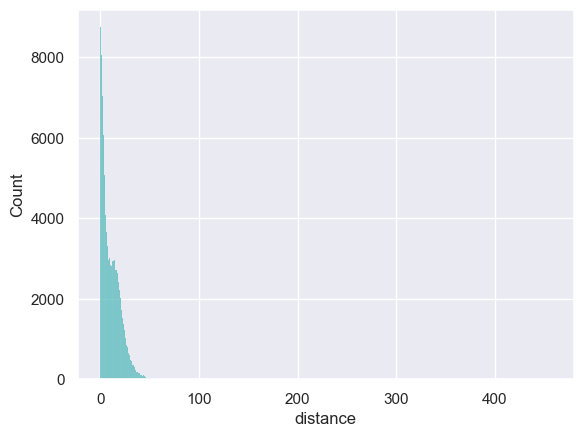

In [42]:
sns.histplot(data=distance, x="distance", color="#47B5B7")

In [43]:
# get the 95th percentile of the distance
distance_threshold = distance['distance'].quantile(0.95)
distance_threshold

29.082299371791287

<AxesSubplot: xlabel='distance', ylabel='Count'>

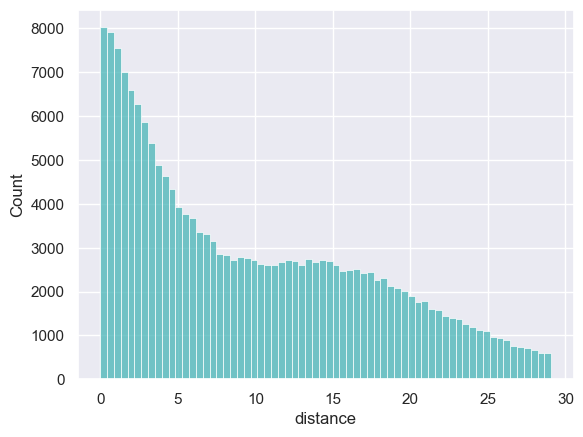

In [45]:
#plot only the labels that are within the 95th percentile
sns.histplot(data=distance[distance['distance'] < distance_threshold], x="distance", color="#47B5B7")


In [46]:
#calulate the 50%, 60%, 70% 80%, 90% percentile of the distance
distance_50 = labels_mapped_on_sidewalk['distance'].quantile(0.5)
distance_60 = labels_mapped_on_sidewalk['distance'].quantile(0.6)
distance_70 = labels_mapped_on_sidewalk['distance'].quantile(0.7)
distance_75 = labels_mapped_on_sidewalk['distance'].quantile(0.75)
distance_80 = labels_mapped_on_sidewalk['distance'].quantile(0.8)

Text(17.964638847310205, 0, '80%')

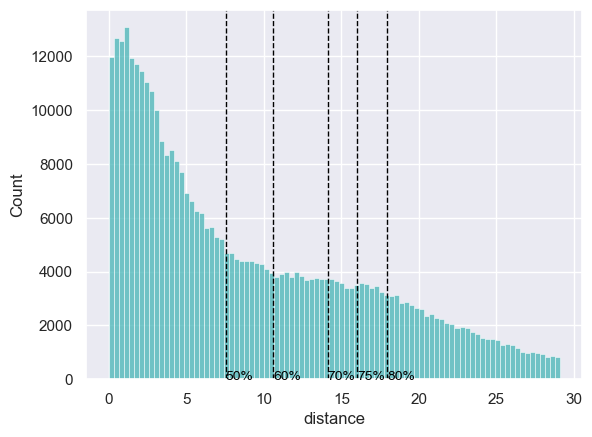

In [47]:
#calulate the 60%, 70%, 80%, 90% percentile of the distance and plot them as lines on the histogram
sns.histplot(data=labels_mapped_on_sidewalk[labels_mapped_on_sidewalk['distance'] < distance_threshold], x="distance", color="#47B5B7")
plt.axvline(distance_50, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_60, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_70, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_75, color='black', linestyle='dashed', linewidth=1)
plt.axvline(distance_80, color='black', linestyle='dashed', linewidth=1)
# add x labels for the lines
plt.text(distance_50, 0, '50%', color='black', fontsize=10)
plt.text(distance_60, 0, '60%', color='black', fontsize=10)
plt.text(distance_70, 0, '70%', color='black', fontsize=10)
plt.text(distance_75, 0, '75%', color='black', fontsize=10)
plt.text(distance_80, 0, '80%', color='black', fontsize=10)



In [48]:
# save distance into a csv file
distance.to_csv('data/distance.csv', index=False)